# Set Up

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 24.8 MB 4.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.3 which is incompatible.
hypertools 0.7.0 requires scikit-learn!=0.22,<0.24,>=0.19.1, but you have scikit-learn 1.0.2 which is incompatible.


In [3]:
# linear algebra
import numpy as np
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
#Unix commands
import os

# import useful tools
from glob import glob
from PIL import Image
from sklearn import tree
import cv2
import pydicom
import pickle
import scipy.ndimage
from skimage import measure 
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage.morphology import disk, opening, closing
from tqdm import tqdm
from os import listdir, mkdir
from sklearn.decomposition import PCA
from IPython.display import HTML
from PIL import Image

# import data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import plotly.express as px

from bokeh.plotting import figure
from bokeh.io import output_notebook, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Panel
from bokeh.models.widgets import Tabs

# import data augmentation
import albumentations as albu

# import math module
import math

#Libraries
from tqdm import tqdm
import time
import pandas_profiling
import sklearn
import xgboost as xgb
from sklearn.metrics import log_loss, roc_curve, auc, f1_score, recall_score, precision_recall_curve, precision_score, accuracy_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RepeatedKFold, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from scipy.stats import norm

#used for changing color of text in print statement
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

# One-hot encoding
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [4]:
print(sklearn.__version__)

1.0.2


# Loading data

In [5]:
# Setup the paths to train and test images
DATASET = '../input/titanic'
TEST_PATH = '../input/titanic/test.csv'
TRAIN_PATH = '../input/titanic/train.csv'
SAMPLE_PATH = '../input/titanic/gender_submission.csv'

# Loading training data and test data
test = pd.read_csv(TEST_PATH)
df = pd.read_csv(TRAIN_PATH)
sample = pd.read_csv(SAMPLE_PATH)

In [6]:
# Confirmation of the format of samples for submission
sample.head(5).style.applymap(lambda x: 'background-color:lightsteelblue')

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


* We only need to submit a passenger ID and a value of 0 and 1 to distinguish whether they are alive or not.
* The value of ’Survived’ is 1 if the passenger is alive.
* The value of ’Survived’ is 0 if he or she is dead.
* It's a very clean break.

# Have A Look

In [7]:
HTML('<iframe width="600" height="400" src="https://www.youtube.com/embed/8yZMXCaFshs" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# Checking data

In [8]:
# Check about columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
print(f"{b_}Number of rows in train data: {r_}{df.shape[0]}\n{b_}Number of columns in train data: {r_}{df.shape[1]}")

Number of rows in train data: 891
Number of columns in train data: 12


In [10]:
# Look at the top of the data to get an overview
df.head(5).style.applymap(lambda x: 'background-color:lightsteelblue')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S


In [11]:
# Look at the top of the data to get an overview
df.head(5).style.applymap(lambda x: 'background-color:lightsteelblue')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S


In [12]:
# Look at the top of the test data to get an overview
test.head(5).style.applymap(lambda x: 'background-color:lightsteelblue')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.829200,nan,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.000000,nan,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.687500,nan,Q
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.662500,nan,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.287500,nan,S


In [13]:
print(f"{b_}Number of Alive in train data: {r_}{len(df[df['Survived'] == 1])}\n{b_}Number of Dead in train data: {r_}{len(df[df['Survived'] == 0])}")
print(f"{b_}Percentage of Survivors in train data: {r_}{len(df[df['Survived'] == 1])/(len(df[df['Survived'] == 1]) + len(df[df['Survived'] == 0]))}")

Number of Alive in train data: 342
Number of Dead in train data: 549
Percentage of Survivors in train data: 0.3838383838383838


pclass: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

In [14]:
print(f"{b_}Percentage of Survivors of Pclass3 in train data: {r_}{len(df[(df['Pclass'] == 3)&(df['Survived'] == 1)]) / (len(df[(df['Pclass'] == 3)&(df['Survived'] == 1)]) + len(df[(df['Pclass'] == 3)&(df['Survived'] == 0)]))}")
print(f"{b_}Percentage of Survivors of Pclass2 in train data: {r_}{len(df[(df['Pclass'] == 2)&(df['Survived'] == 1)]) / (len(df[(df['Pclass'] == 2)&(df['Survived'] == 1)]) + len(df[(df['Pclass'] == 2)&(df['Survived'] == 0)]))}")
print(f"{b_}Percentage of Survivors of Pclass1 in train data: {r_}{len(df[(df['Pclass'] == 1)&(df['Survived'] == 1)]) / (len(df[(df['Pclass'] == 1)&(df['Survived'] == 1)]) + len(df[(df['Pclass'] == 1)&(df['Survived'] == 0)]))}")

Percentage of Survivors of Pclass3 in train data: 0.24236252545824846
Percentage of Survivors of Pclass2 in train data: 0.47282608695652173
Percentage of Survivors of Pclass1 in train data: 0.6296296296296297


In [15]:
print(f"{b_}Number of rows in test data: {r_}{test.shape[0]}\n{b_}Number of columns in test data: {r_}{test.shape[1]}")

Number of rows in test data: 418
Number of columns in test data: 11


In [16]:
# Aggregate by Survived column
df.groupby('Survived').mean()['Age']

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [17]:
# Aggregate by Survived column
df.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [18]:
# Creat a pivot table on ship's grade and age
df_pivot = pd.pivot_table(df, index = 'Survived', columns = 'Pclass', values = 'Age')
df_pivot = np.array(df_pivot)

In [19]:
# Check for missing values in the training features data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
# Check for missing values in the testing features data
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

* Unfortunately, we have to admit that there are deficiencies in Age and Cabin, Embarked.

# Checking data statistics

In [21]:
# Check statistics in the training data
df.describe().style.applymap(lambda x: 'background-color:yellow')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
# Check the statistics in the Age column
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [23]:
x = df['Survived'].mean() * 100
survival_rate = math.floor(x)
print('Total number of passengers: ', df['PassengerId'].count())
print('Passenger survival rate: ', survival_rate)

Total number of passengers:  891
Passenger survival rate:  38


* The definition of Variable for data is as stated on [this page](https://www.kaggle.com/c/titanic/data).

In [24]:
# make sure there are no duplicate passenger IDs
df.duplicated(['PassengerId']).any()

False

In [25]:
# make sure there are no duplicate passenger IDs
test.duplicated(['PassengerId']).any()

False

* We were able to verify that there was no duplicate passenger ID.

In [26]:
# Check statistics in the test data
test.describe().style.applymap(lambda x: 'background-color:lightgreen')

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Data Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

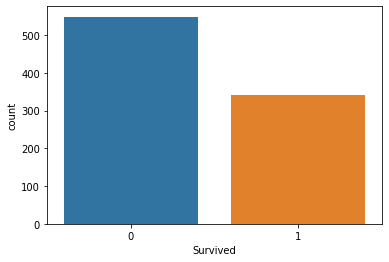

In [27]:
# Show the number of live deaths
sns.countplot(data=df, x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

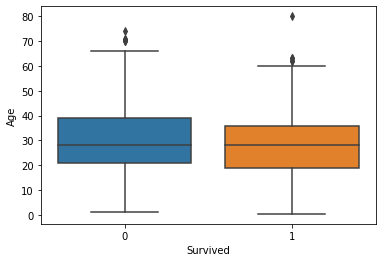

In [28]:
sns.boxplot(data=df, x='Survived', y='Age')

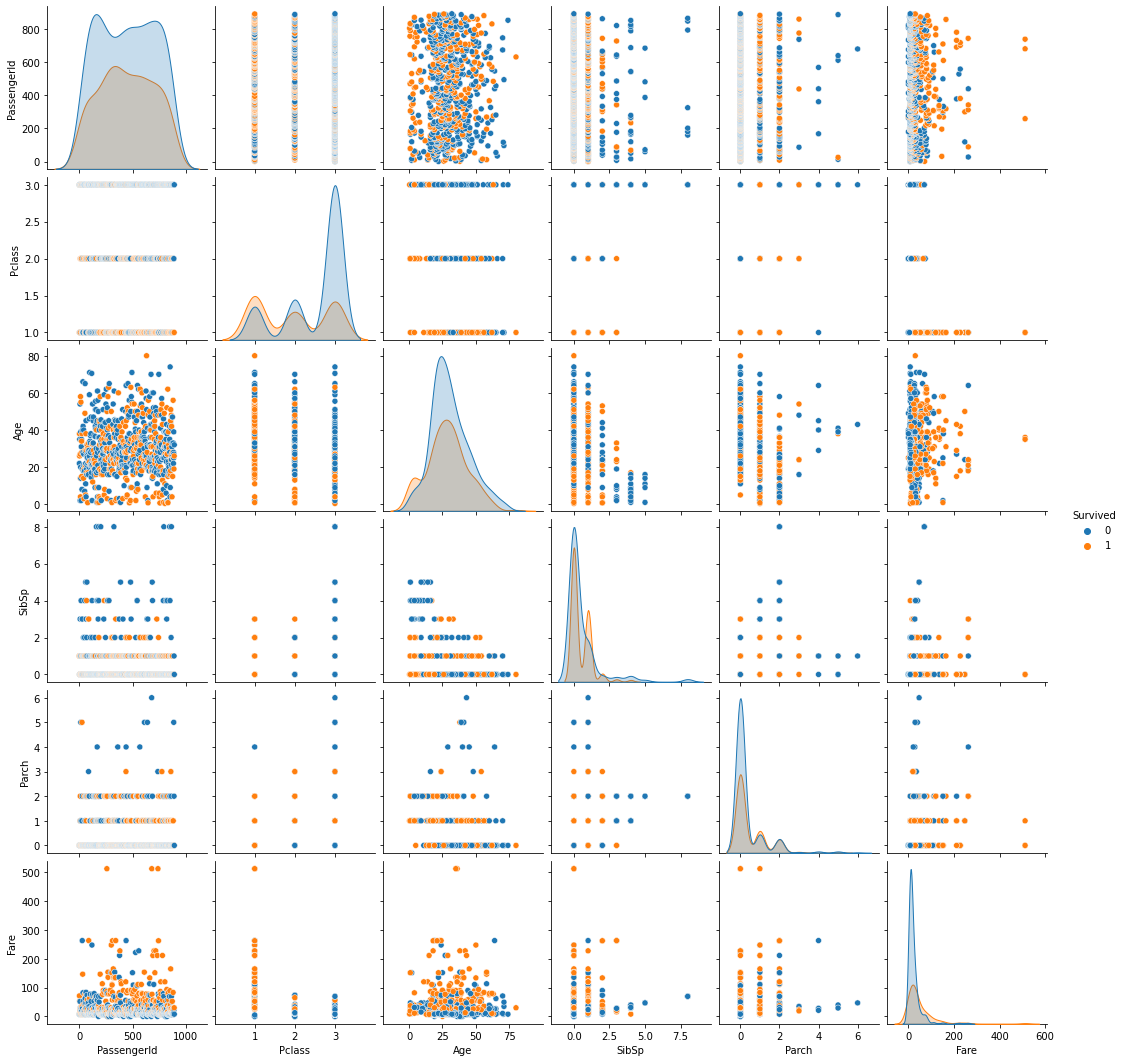

In [29]:
sns.pairplot(df, hue='Survived')

<AxesSubplot:>

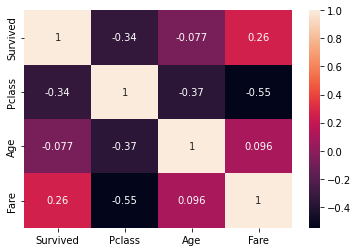

In [30]:
sns.heatmap(df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']].corr(), annot=True)

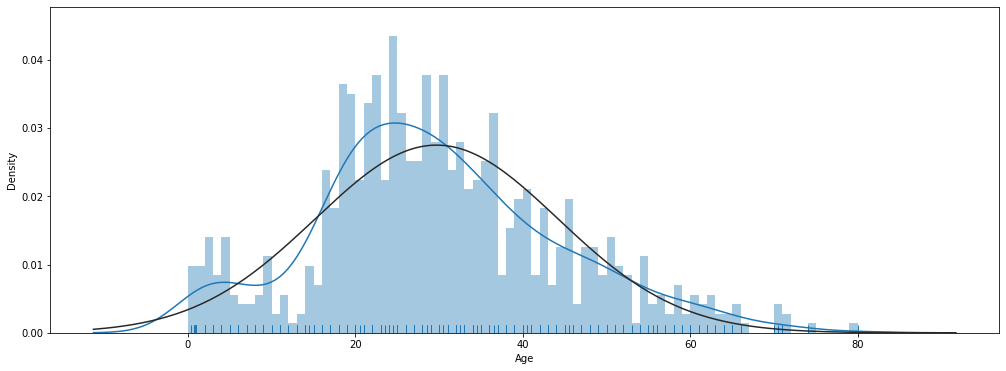

In [31]:
plt.figure(figsize = [17,6])
a = sns.distplot(df['Age'].dropna(),bins = range(0,81,1), rug = True, fit = norm)

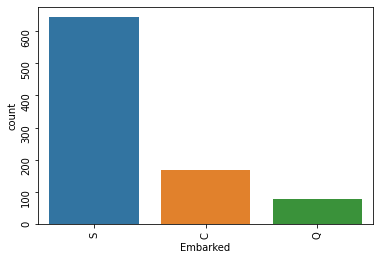

In [32]:
# Display a bar graph of Embarked
ax = sns.countplot(x='Embarked', data=df)
ax.tick_params(rotation=90)

* Embarked means that port of embarkation.
* C is 'Cherbourg', Q is 'Queenstown', S is 'Southampton'.
* Since 'S' is by far the most common mode, if there is a missing value in Embarked, it seems better to fill it in with S.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

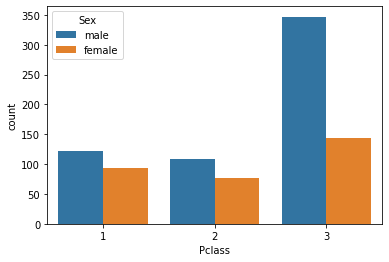

In [33]:
# Display a bar graph of passenger classes by gender
sns.countplot(x="Pclass", hue="Sex",data=df)

* pclass means Ticket class.

* One means 1st, 2 means 2nd, and 3 means 3rd.

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

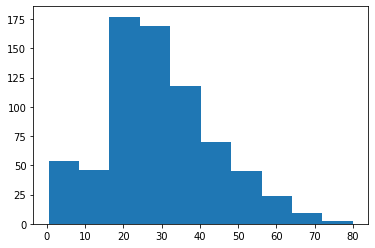

In [34]:
# Display a bar graph of passengers by age
plt.hist(df['Age'])

* Let's look at the data with the hypothesis that survival rates for children and the elderly may be lower.

In [35]:
# Extract data on children and the elderly
train_children = df.query('Age < 20')
train_seniors = df.query('Age > 60')

# Combinine the extracted data for children and elderly
train_c_and_s = pd.concat([train_children, train_seniors])

In [36]:
# Calculate passenger numbers and survival rates from data on children and the elderly
r = train_c_and_s['Survived'].mean() * 100
survival_rate = math.floor(r)
print('Total number of passengers: ', train_c_and_s['PassengerId'].count())
print('Passenger survival rate: ', survival_rate)

Total number of passengers:  186
Passenger survival rate:  45


* We looked at survival rates for child and elderly drinkers. The results were surprisingly 45%, which is rather high compared to the 38% survival rate for all passengers.

<AxesSubplot:xlabel='Survived', ylabel='count'>

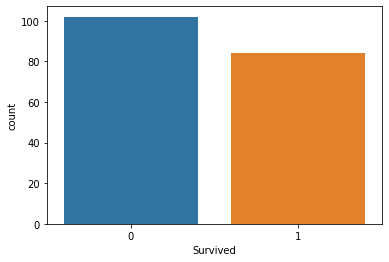

In [37]:
# Show the number of live deaths of the elderly and children
sns.countplot(data=train_c_and_s, x='Survived')

In [38]:
# Extract data for first and third class passengers
train_1st = df.query('Pclass == 1')
train_3rd = df.query('Pclass == 3')

# Calculate passenger numbers and survival rates from data on Pclass
r1 = train_1st['Survived'].mean() * 100
r3 = train_3rd['Survived'].mean() * 100
survival_rate_1st = math.floor(r1)
survival_rate_3rd = math.floor(r3)
print('Total number of 1st class passengers: ', train_1st['PassengerId'].count())
print('1st class Passenger survival rate: ', survival_rate_1st)
print('Total number of 3rd class passengers: ', train_3rd['PassengerId'].count())
print('3rd class passenger survival rate: ', survival_rate_3rd)

Total number of 1st class passengers:  216
1st class Passenger survival rate:  62
Total number of 3rd class passengers:  491
3rd class passenger survival rate:  24


* Next, let's look at the data, hypothesizing that the first class of passengers may have a higher survival rate and the third class may have a lower survival rate.

<AxesSubplot:xlabel='Survived', ylabel='count'>

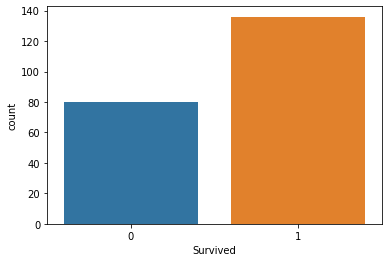

In [39]:
# Show the number of live deaths of the Pclass 1st
sns.countplot(data=train_1st, x='Survived')

In [40]:
# Calculate passenger numbers and survival rates from data on children and the elderly
survival_rate = math.floor(r1)
print('Total number of passengers: ', train_1st['PassengerId'].count())
print('Passenger survival rate: ', survival_rate)

Total number of passengers:  216
Passenger survival rate:  62


* Next, let's look at the data, hypothesizing that the first class of passengers may have a higher survival rate and the third class may have a lower survival rate.

<AxesSubplot:xlabel='Survived', ylabel='count'>

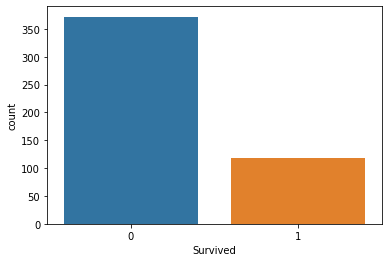

In [41]:
# Show the number of live deaths of the Pclass 3rd
sns.countplot(data=train_3rd, x='Survived')

In [42]:
# Calculate passenger numbers and survival rates from data on children and the elderly
survival_rate = math.floor(r3)
print('Total number of passengers: ', train_3rd['PassengerId'].count())
print('Passenger survival rate: ', survival_rate)

Total number of passengers:  491
Passenger survival rate:  24


* We found a nearly threefold difference in survival rates between first- and third-class passengers.

# Data preprocessing

In [43]:
# Data preparation
test_id = test['PassengerId']
df.drop(['PassengerId','SibSp','Name','Parch','Cabin','Ticket'], axis=1, inplace=True)
test.drop(['PassengerId','SibSp', 'Parch', 'Ticket', 'Name', 'Cabin'], axis=1, inplace=True)

In [44]:
# Completion of Missing value of training data
df['Embarked'].fillna('S', inplace=True)

In [45]:
test[test['Fare'].isnull()]

,Pclass,Sex,Age,Fare,Embarked
152,3,male,60.5,NaN,S


In [46]:
is_null = df['Age'].isnull()

In [47]:
# Completion of Missing value of Pclass1 of training data
df.loc[(df['Pclass'] == 1) & (df['Survived'] == 0) &(is_null) , 'Age'] = df_pivot[0, 0]
df.loc[(df['Pclass'] == 1) & (df['Survived'] == 1) &(is_null) , 'Age'] = df_pivot[1, 0]

# Completion of Missing value of Pclass2 of training data
df.loc[(df['Pclass'] == 2) & (df['Survived'] == 0) &(is_null) , 'Age'] = df_pivot[0, 1]
df.loc[(df['Pclass'] == 2) & (df['Survived'] == 1) &(is_null) , 'Age'] = df_pivot[1, 1]

# Completion of Missing value of Pclass3 of training data
df.loc[(df['Pclass'] == 3) & (df['Survived'] == 0) &(is_null) , 'Age'] = df_pivot[0, 2]
df.loc[(df['Pclass'] == 3) & (df['Survived'] == 1) &(is_null) , 'Age'] = df_pivot[1, 2]

In [48]:
# Check again for missing values in the training features data
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [49]:
is_null = df['Fare'].isnull()

In [50]:
# Completion of Missing value of Pclass3 of test data
test.loc[(['Pclass'] == 3) & (is_null) , 'Fare'] = test[test['Pclass'] == 3]['Fare'].mean()

In [51]:
is_null = test['Age'].isnull()

In [52]:
# Completion of Missing value of Pclass1 of test data
test.loc[(test['Pclass'] == 1) & (is_null) , 'Age'] = test[test['Pclass'] == 1]['Age'].mean()

# Completion of Missing value of Pclass2 of test data
test.loc[(test['Pclass'] == 2) & (is_null) , 'Age'] = test[test['Pclass'] == 2]['Age'].mean()

# Completion of Missing value of Pclass3 of test data
test.loc[(test['Pclass'] == 3) & (is_null) , 'Age'] = test[test['Pclass'] == 3]['Age'].mean()

In [53]:
# Completion of Missing value of trainning data
test['Fare'].fillna(test[test['Pclass'] == 3]['Fare'].mean(), inplace=True)

In [54]:
# Check again for missing values in the test features data
test.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [55]:
# Make it a dummy variable
df = pd.get_dummies(df, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [56]:
# Data preparation
y_col = 'Survived'
y = df[y_col]
X = df.drop(columns=[y_col])

In [57]:
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [58]:
# Make it a dummy variable
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [59]:
# Check again for missing values in the training features data
test.isnull().sum()

Pclass        0
Age           0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [60]:
# Check for missing values in the testing features data
X_train.isnull().sum()

Pclass        0
Age           0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [61]:
# Check for missing values in the testing features data
X_test.isnull().sum()

Pclass        0
Age           0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [62]:
# Model Learning
model = tree.DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

<BarContainer object of 6 artists>

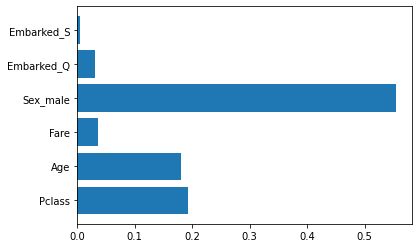

In [63]:
# Importance of features
plt.barh(model.feature_names_in_, model.feature_importances_)

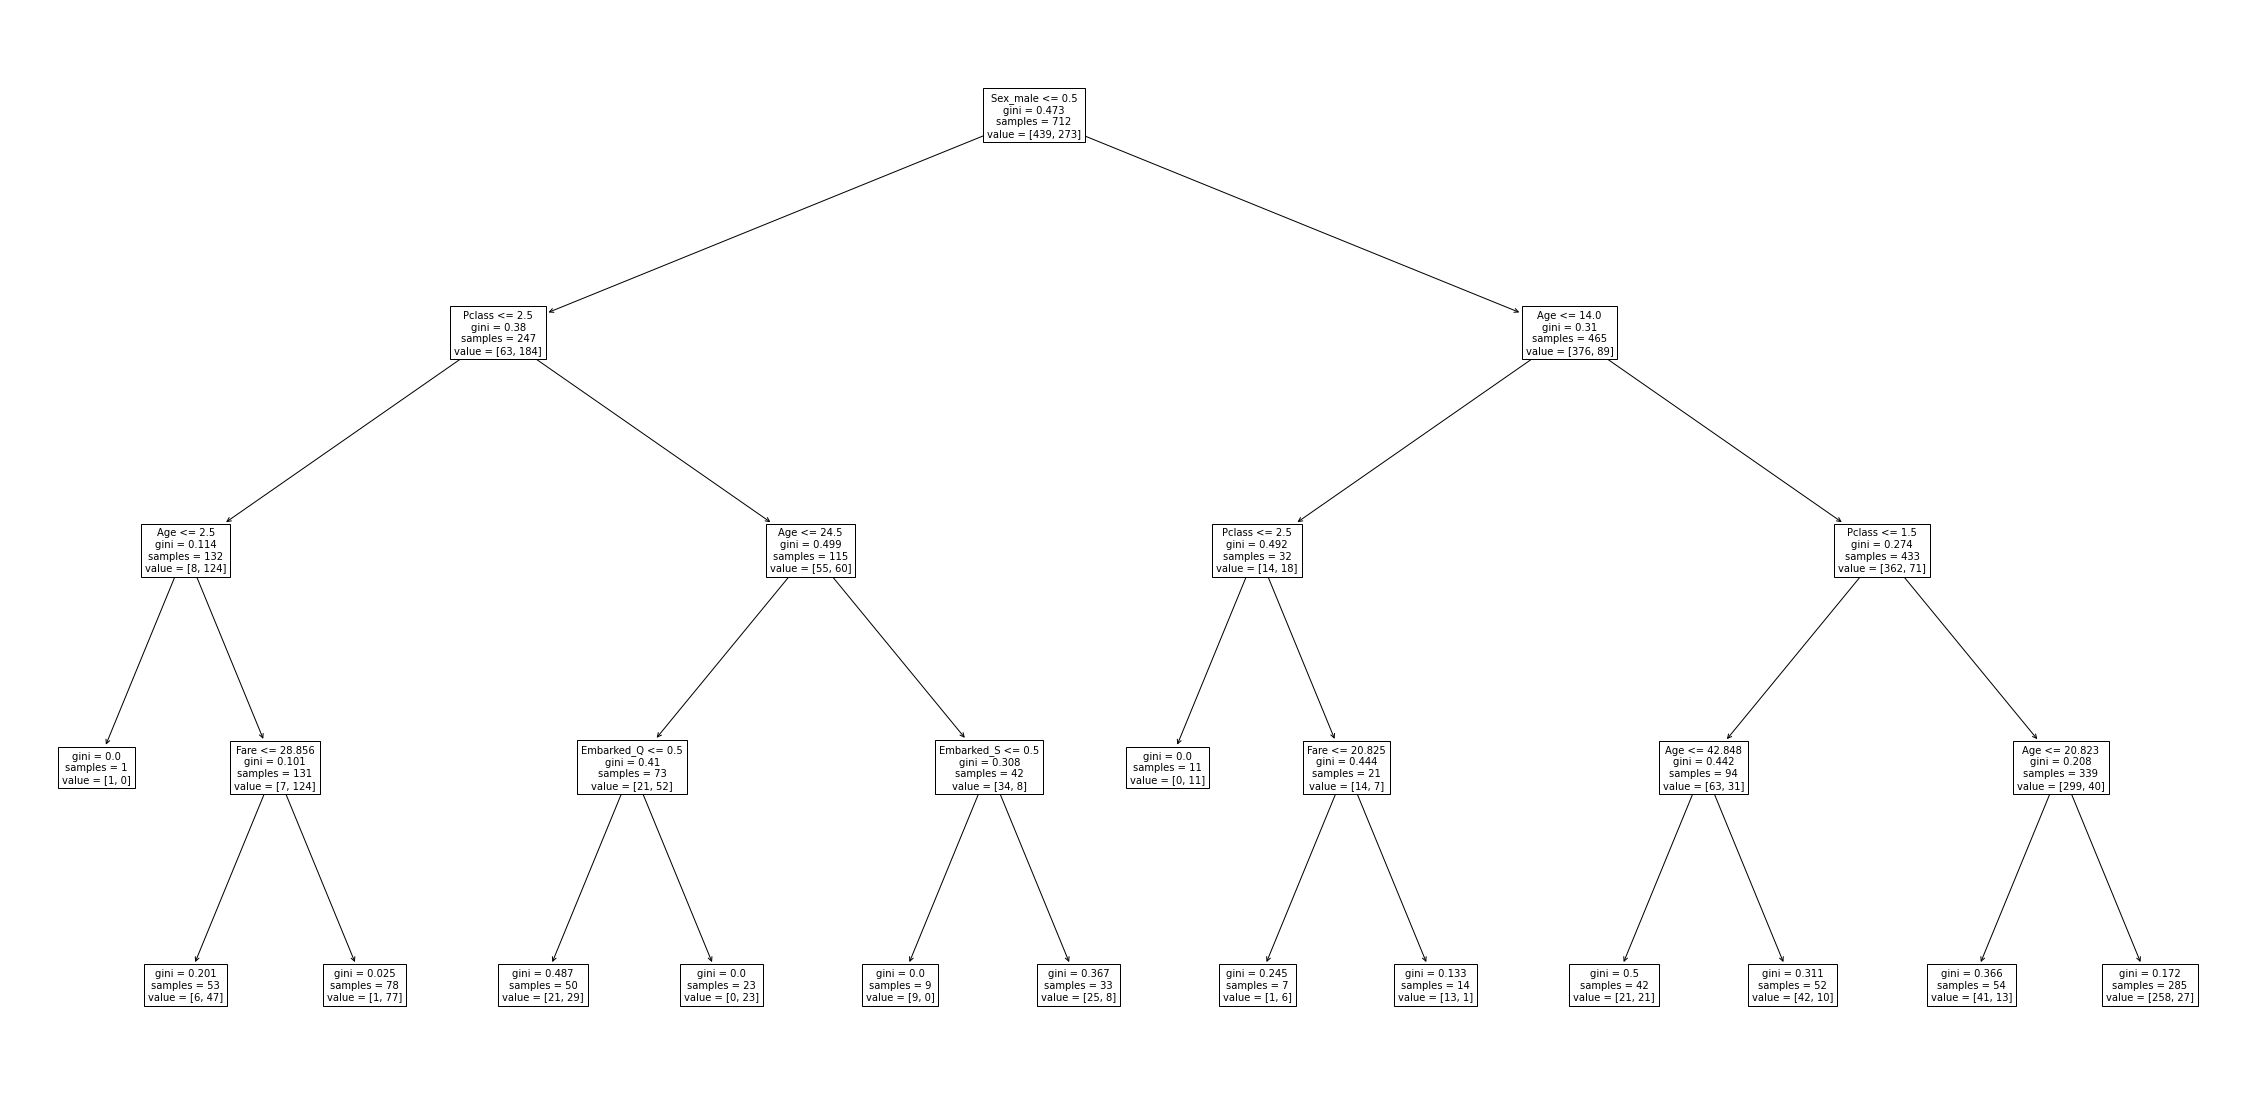

In [64]:
plt.figure(figsize=(40, 20))
_ = tree.plot_tree(model, fontsize=10, feature_names=model.feature_names_in_)

## Minimal Cost Complexity Pruning

In [65]:
model = tree.DecisionTreeClassifier(max_depth=4, random_state=100, class_weight='balanced')
path = model.cost_complexity_pruning_path(X_train, y_train)

* Insert arguments to address imbalance data.

In [66]:
eff_alphas = path.ccp_alphas

In [67]:
models = []
for eff_alpha in eff_alphas:
    model = tree.DecisionTreeClassifier(random_state=100, ccp_alpha=eff_alpha, class_weight='balanced')
    model.fit(X_train, y_train)
    models.append(model)

In [68]:
# Evaluation
train_scores = [mean_squared_error(y_train, model.predict(X_train)) for model in models]
test_scores = [mean_squared_error(y_test, model.predict(X_test)) for model in models]

Text(0, 0.5, 'MSE')

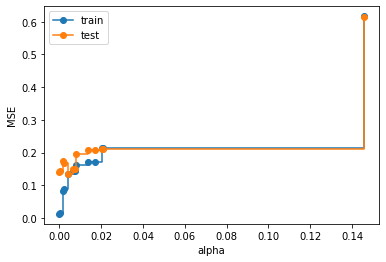

In [69]:
plt.plot(eff_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
plt.plot(eff_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')

In [70]:
# Define Learn function
def learn(X, y, depth = 3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
    
    model = tree.DecisionTreeClassifier(max_depth = depth, random_state=0, class_weight = 'balanced')
    model.fit(X_train, y_train)
    
    score = model.score(X = X_train, y = y_train)
    score2 = model.score(X = X_test, y = y_test)
    return round(score, 3), round(score, 2), model

In [71]:
# Check the change in the percentage of correct answers in the training and test data due to changes in the tree depth
for j in range(1,30):
# 'j' is the depth of the tree
    s1, s2, m = learn(X, y, depth = j)
    sentence = 'depth{}:Accuracy of training data{}::Accuracy of test data{}'
    print(sentence.format(j, s1, s2))

depth1:Accuracy of training data0.787::Accuracy of test data0.79
depth2:Accuracy of training data0.792::Accuracy of test data0.79
depth3:Accuracy of training data0.84::Accuracy of test data0.84
depth4:Accuracy of training data0.854::Accuracy of test data0.85
depth5:Accuracy of training data0.869::Accuracy of test data0.87
depth6:Accuracy of training data0.876::Accuracy of test data0.88
depth7:Accuracy of training data0.895::Accuracy of test data0.89
depth8:Accuracy of training data0.907::Accuracy of test data0.91
depth9:Accuracy of training data0.914::Accuracy of test data0.91
depth10:Accuracy of training data0.94::Accuracy of test data0.94
depth11:Accuracy of training data0.949::Accuracy of test data0.95
depth12:Accuracy of training data0.966::Accuracy of test data0.97
depth13:Accuracy of training data0.978::Accuracy of test data0.98
depth14:Accuracy of training data0.985::Accuracy of test data0.98
depth15:Accuracy of training data0.986::Accuracy of test data0.99
depth16:Accuracy of t

In [72]:
# Retrain the model again with a tree depth of 16
s1, s2, model = learn(X, y, depth = 16)

# Model Saving
with open('survived.pkl', 'wb') as f:
    pickle.dump(model, f)

In [73]:
# Prediction
y_pred = model.predict(test)
y_predict = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [74]:
final = pd.DataFrame({'PassengerId':test_id,'Survived':y_pred})
final.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [75]:
final.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


# Model Evaluation

In [76]:
# LogLoss
log_loss(y_test, y_pred_proba)

4.829849223667772

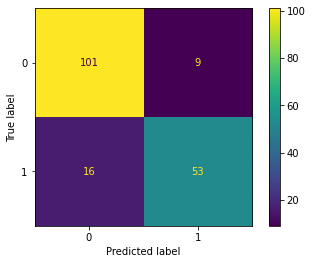

In [77]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [78]:
# Accuracy Score
accuracy_score(y_test, y_predict)

0.8603351955307262

In [79]:
# Recall Score
recall_score(y_test, y_predict)

0.7681159420289855

In [80]:
# Precision
precision_score(y_test, y_predict)

0.8548387096774194

In [81]:
# Specificity
recall_score(np.array(y_test)!=1, np.array(y_predict)!=1)

0.9181818181818182

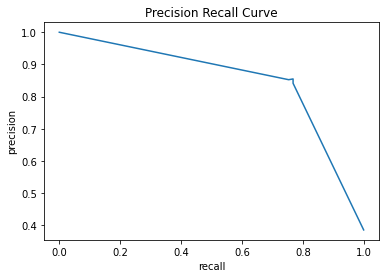

In [82]:
# PrecisionRecallCurve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.show()

In [83]:
# F1 Score
f1_score(y_test, y_predict)

0.8091603053435115

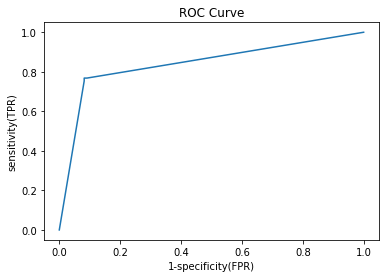

In [84]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('1-specificity(FPR)')
plt.ylabel('sensitivity(TPR)')
plt.title('ROC Curve')
plt.show()

In [85]:
auc(fpr, tpr)

0.8415019762845849

In [86]:
# Set the total value 
bar = tqdm(total = 1000)
# Add description
bar.set_description('Progress rate')
for i in range(100):
    # Set the progress
    bar.update(25)
    time.sleep(1)

Progress rate: : 2500it [01:39, 24.96it/s]

* Your upvote will motivate me.

# Compliment
* [Titanic_prediction(SVM)](https://www.kaggle.com/code/shithavengara/titanic-prediction-svm)
* [SVM (Titanic)](https://www.kaggle.com/code/rezvanrah/svm-titanic)
* [Titanic Prediction with SVM](https://www.kaggle.com/code/l3r4nd/titanic-prediction-with-svm)